## Plot by Demographics

Inspired by https://arxiv.org/abs/2410.19599

In [2]:
import pandas as pd 

In [3]:
Dsim = pd.read_csv("similarity_calculations_LLama_150.csv")

Dsim.head()

,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,0,49,json_datasets_200/all_4.jsonl,Text_SubjectiveLit,0.993544,I feel pretty confident in my ability to obtai...,"I feel I am capable of obtaining, processing a..."
1,1,49,json_datasets_200/all_4.jsonl,Text_Anxiety,0.965160,"I worry about getting bad news, like finding o...",What makes me feel most anxious or worried whe...
2,2,49,json_datasets_200/all_4.jsonl,Text_Numeracy,0.971530,I had a friend who was experiencing symptoms o...,I had had some bad chest pains and thought I w...
3,3,49,json_datasets_200/all_4.jsonl,Text_TrustPhys,0.974293,I trust my doctor because he's not too pushy o...,I trust my doctor because he is always upfront...
4,4,49,json_datasets_200/conditioning_on_all.jsonl,Text_SubjectiveLit,0.989326,I'd say I have a pretty good grasp on obtainin...,"I feel I am capable of obtaining, processing a..."


In [7]:
from utils import *
EXPERIMENT_TYPE = 'Demographic + Behavioral + Psychological'
file_path = 'Data/Data_SurveyPlusDemographics.txt'
data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

# Data preprocess
data, psychological_list = convert_to_natural_language(data)
data, fipi_columns = split_fipi_responses(data)
data.drop(columns=['FIPI_response'], inplace=True, errors='ignore')
psychological_list.extend(fipi_columns)


train_data = select_experiment_data(data, EXPERIMENT_TYPE)
train_data = process_data_based_on_experiment(train_data, EXPERIMENT_TYPE)

# add labels column
label_columns = ['Text_SubjectiveLit', 'Text_Anxiety', 'Text_Numeracy', 'Text_TrustPhys']
train_data = pd.concat([train_data, data[label_columns]], axis=1)

/tmp/ipykernel_2231/1438049294.py:4: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
/home/jlalor1/code/psych-agent-llm/utils.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(clean_numeric)
/home/jlalor1/code/psych-agent-llm/utils.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(clean_numeric)
/home/jlalor1/code/psych-age

In [8]:
train_data.head()

,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,HC_1,HC_2,...,HC_5,FIPI_1_response,FIPI_2_response,FIPI_3_response,FIPI_4_response,FIPI_5_response,Text_SubjectiveLit,Text_Anxiety,Text_Numeracy,Text_TrustPhys
0,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You strongly agree that you are agreeable and ...,You strongly agree that you are dependable and...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I believe that I understand most of what my he...,"With some health care providers in the past, I...",A friend had been given antibiotic eye drops f...,"She never seems rushed with me, and she will a..."
1,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,Agree,Agree,...,Agree,You unknown that you are extraverted and enthu...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You strongly agree that you are emotionally st...,You agree that you are open to experience and ...,I feel like I can understand 90% of what is be...,I worry that I won't get the full attention of...,Just normal doctor visits and testing. not wo...,"My doctor wants to give his all, but the time ..."
2,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,Neutral,Neutral,...,Neutral,You strongly agree that you are extraverted an...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I feel that while I am not a health expert I d...,I do not like to wait for test results to say ...,I tried to use my math skills the best that I ...,I like that the dr takes the time to listen an...
3,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,Neutral,Neutral,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,I feel fairly confident that when I see medica...,The thing that makes me most anxious is wonder...,"I studied athletic training in college, and I'...","Typically when I see a doctor, they are a medi..."
4,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,"I am okay with it for the most part, but I of...",I just get nervous having to sit in doctor's o...,Every time I researched my symptoms myself and...,I trust my doctor because he is highly trained...


In [9]:
train_data.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'Dmed_7', 'Dmed_8', 'HC_1', 'HC_2',
       'HC_3', 'HC_4', 'HC_5', 'FIPI_1_response', 'FIPI_2_response',
       'FIPI_3_response', 'FIPI_4_response', 'FIPI_5_response',
       'Text_SubjectiveLit', 'Text_Anxiety', 'Text_Numeracy',
       'Text_TrustPhys'],
      dtype='object')

In [22]:
Dtrain = train_data[["D1", "D2","D3","D4","D5","D6","Dmed_7","Dmed_8","Text_SubjectiveLit", "Text_Anxiety", "Text_Numeracy","Text_TrustPhys"]]
Dtrain["id"] = Dtrain.index

Dtrain.head()

/tmp/ipykernel_2231/3733813787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dtrain["id"] = Dtrain.index


,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_SubjectiveLit,Text_Anxiety,Text_Numeracy,Text_TrustPhys,id
0,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,"With some health care providers in the past, I...",A friend had been given antibiotic eye drops f...,"She never seems rushed with me, and she will a...",0
1,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,I feel like I can understand 90% of what is be...,I worry that I won't get the full attention of...,Just normal doctor visits and testing. not wo...,"My doctor wants to give his all, but the time ...",1
2,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,I feel that while I am not a health expert I d...,I do not like to wait for test results to say ...,I tried to use my math skills the best that I ...,I like that the dr takes the time to listen an...,2
3,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,I feel fairly confident that when I see medica...,The thing that makes me most anxious is wonder...,"I studied athletic training in college, and I'...","Typically when I see a doctor, they are a medi...",3
4,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,"I am okay with it for the most part, but I of...",I just get nervous having to sit in doctor's o...,Every time I researched my symptoms myself and...,I trust my doctor because he is highly trained...,4


In [42]:
Dtrainlong = pd.wide_to_long(Dtrain, "Text_", i="id", j="topic", suffix="\D+").reset_index()

Dtrainlong["topic"] = "Text_" + Dtrainlong["topic"].astype(str)

In [43]:
Dtrainlong.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_
0,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...
1,1,Text_SubjectiveLit,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,I feel like I can understand 90% of what is be...
2,2,Text_SubjectiveLit,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,I feel that while I am not a health expert I d...
3,3,Text_SubjectiveLit,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,I feel fairly confident that when I see medica...
4,4,Text_SubjectiveLit,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,"I am okay with it for the most part, but I of..."


In [44]:
Dsim.head()

,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,0,49,json_datasets_200/all_4.jsonl,Text_SubjectiveLit,0.993544,I feel pretty confident in my ability to obtai...,"I feel I am capable of obtaining, processing a..."
1,1,49,json_datasets_200/all_4.jsonl,Text_Anxiety,0.965160,"I worry about getting bad news, like finding o...",What makes me feel most anxious or worried whe...
2,2,49,json_datasets_200/all_4.jsonl,Text_Numeracy,0.971530,I had a friend who was experiencing symptoms o...,I had had some bad chest pains and thought I w...
3,3,49,json_datasets_200/all_4.jsonl,Text_TrustPhys,0.974293,I trust my doctor because he's not too pushy o...,I trust my doctor because he is always upfront...
4,4,49,json_datasets_200/conditioning_on_all.jsonl,Text_SubjectiveLit,0.989326,I'd say I have a pretty good grasp on obtainin...,"I feel I am capable of obtaining, processing a..."


In [116]:
D = Dtrainlong.merge(Dsim, left_on=["topic","Text_"], right_on=["Question","True Label"])

D.head()


,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,Completely comfortable with understanding heal...,3008,144,json_datasets_200/all_4.jsonl,Text_SubjectiveLit,0.958283,I'm pretty confident in my ability to find and...,Completely comfortable with understanding heal...
1,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,Completely comfortable with understanding heal...,3012,144,json_datasets_200/conditioning_on_all.jsonl,Text_SubjectiveLit,0.970958,I'd say I have a moderate to high capacity to ...,Completely comfortable with understanding heal...
2,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,Completely comfortable with understanding heal...,3016,144,json_datasets_200/holdout_Text_Anxiety.jsonl,Text_SubjectiveLit,0.957514,I'm pretty confident in my ability to find and...,Completely comfortable with understanding heal...
3,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,Completely comfortable with understanding heal...,3020,144,json_datasets_200/holdout_Text_Numeracy.jsonl,Text_SubjectiveLit,0.965191,I'm pretty confident in my ability to understa...,Completely comfortable with understanding heal...
4,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,Completely comfortable with understanding heal...,3024,144,json_datasets_200/holdout_Text_SubjectiveLit.j...,Text_SubjectiveLit,0.946830,I'm pretty confident in my ability to understa...,Completely comfortable with understanding heal...


In [117]:
# Set up the demographics based on our paper
#D["Age_bin"] = (D["D1"] <= 38).astype(int)
D["Age"] = (D["D1"] <= 32).astype(int)

D["Gender"] = (D["D2"] == 1).astype(int)
D["Race"] = (D["D3"] == 1).astype(int)
D["Education"] = (D["D4"] >= 5).astype(int)
D["Income"] = (D["D5"] >= 4).astype(int)

D.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,...,Condition,Question,Similarity,Generated Response,True Label,Age,Gender,Race,Education,Income
0,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,json_datasets_200/all_4.jsonl,Text_SubjectiveLit,0.958283,I'm pretty confident in my ability to find and...,Completely comfortable with understanding heal...,1,1,0,1,0
1,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,json_datasets_200/conditioning_on_all.jsonl,Text_SubjectiveLit,0.970958,I'd say I have a moderate to high capacity to ...,Completely comfortable with understanding heal...,1,1,0,1,0
2,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,json_datasets_200/holdout_Text_Anxiety.jsonl,Text_SubjectiveLit,0.957514,I'm pretty confident in my ability to find and...,Completely comfortable with understanding heal...,1,1,0,1,0
3,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,json_datasets_200/holdout_Text_Numeracy.jsonl,Text_SubjectiveLit,0.965191,I'm pretty confident in my ability to understa...,Completely comfortable with understanding heal...,1,1,0,1,0
4,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,json_datasets_200/holdout_Text_SubjectiveLit.j...,Text_SubjectiveLit,0.946830,I'm pretty confident in my ability to understa...,Completely comfortable with understanding heal...,1,1,0,1,0


In [118]:
D["Condition"] = D["Condition"].str.replace("json_datasets_200/", "")
D["Condition"] = D["Condition"].str.replace(".jsonl", "")
D["Condition"] = D["Condition"].str.replace("_Text_Anxiety", "")
D["Condition"] = D["Condition"].str.replace("_Text_Numeracy", "")
D["Condition"] = D["Condition"].str.replace("_Text_SubjectiveLit", "")
D["Condition"] = D["Condition"].str.replace("_Text_TrustPhys", "")
D.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,...,Condition,Question,Similarity,Generated Response,True Label,Age,Gender,Race,Education,Income
0,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,all_4,Text_SubjectiveLit,0.958283,I'm pretty confident in my ability to find and...,Completely comfortable with understanding heal...,1,1,0,1,0
1,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,conditioning_on_all,Text_SubjectiveLit,0.970958,I'd say I have a moderate to high capacity to ...,Completely comfortable with understanding heal...,1,1,0,1,0
2,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,holdout,Text_SubjectiveLit,0.957514,I'm pretty confident in my ability to find and...,Completely comfortable with understanding heal...,1,1,0,1,0
3,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,holdout,Text_SubjectiveLit,0.965191,I'm pretty confident in my ability to understa...,Completely comfortable with understanding heal...,1,1,0,1,0
4,8,Text_SubjectiveLit,8.0,1.0,3.0,5.0,3.0,1.0,32.0,140,...,holdout,Text_SubjectiveLit,0.946830,I'm pretty confident in my ability to understa...,Completely comfortable with understanding heal...,1,1,0,1,0


In [119]:
D.Age.describe()

count    4784.000000
mean        0.752508
std         0.431600
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Age, dtype: float64

/tmp/ipykernel_2231/1491316981.py:18: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Race', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


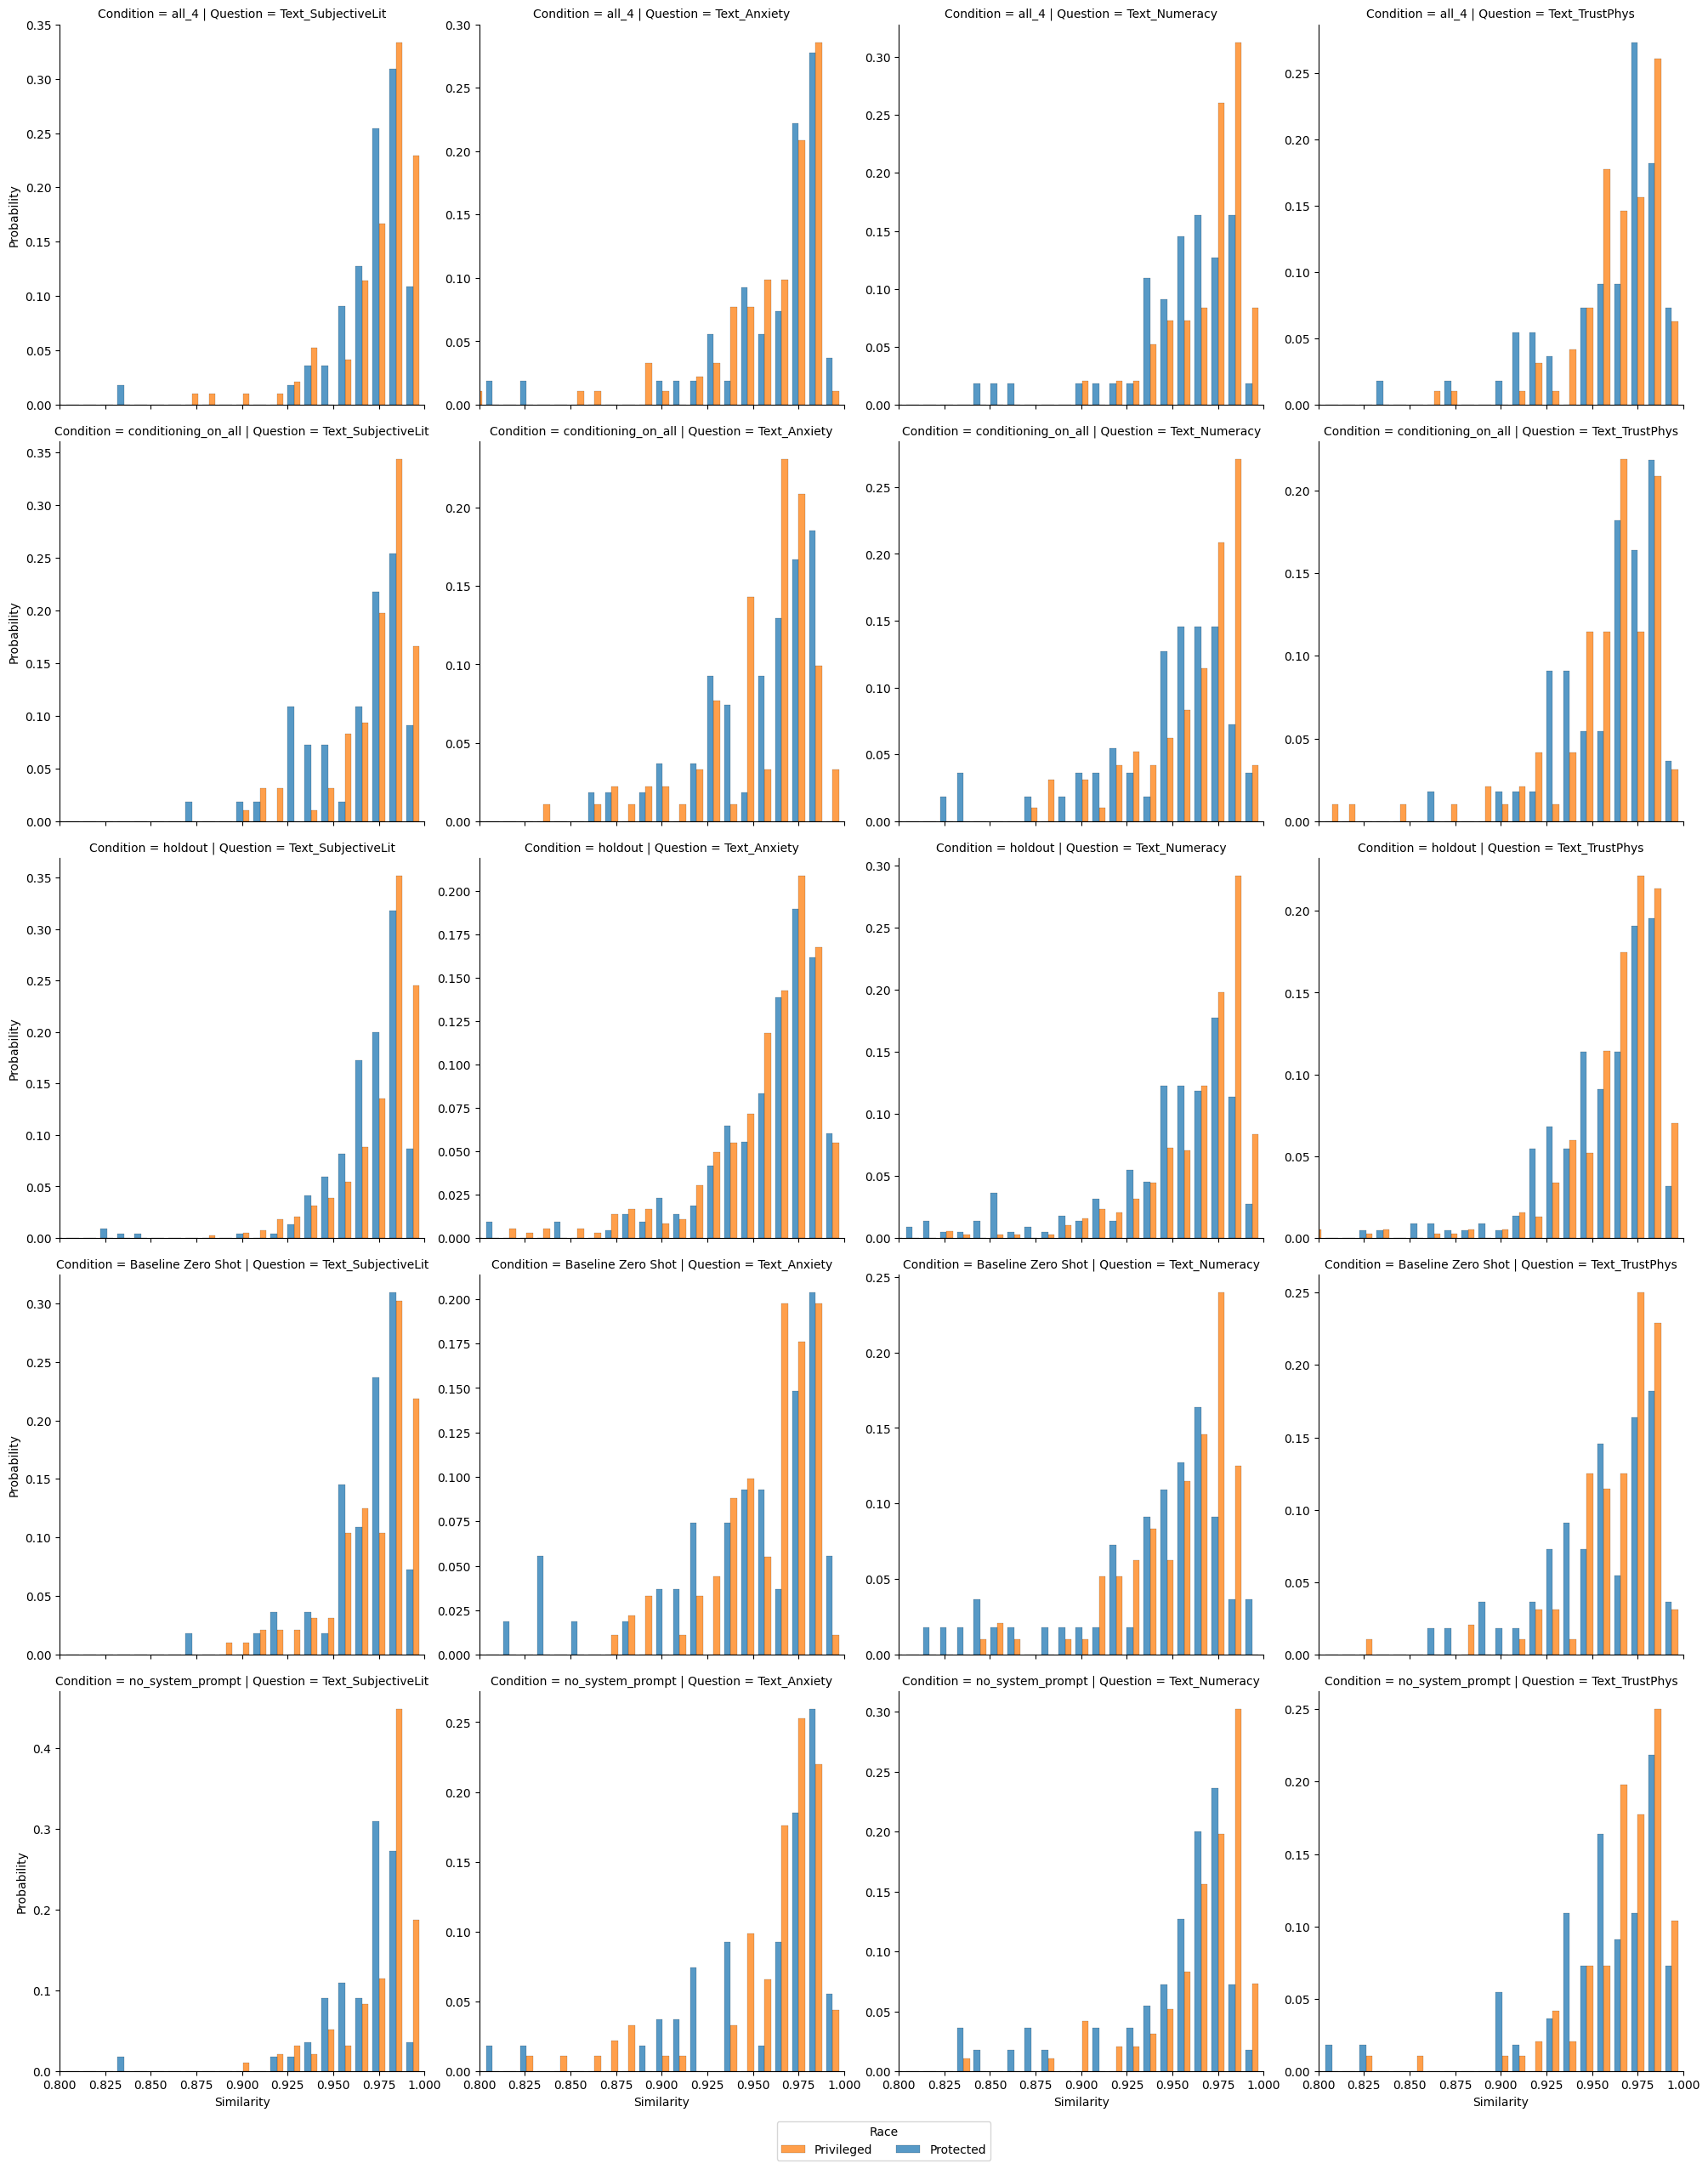

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.displot(
    D, x="Similarity", hue="Race", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Race', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)




/tmp/ipykernel_2231/1768044388.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Age', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


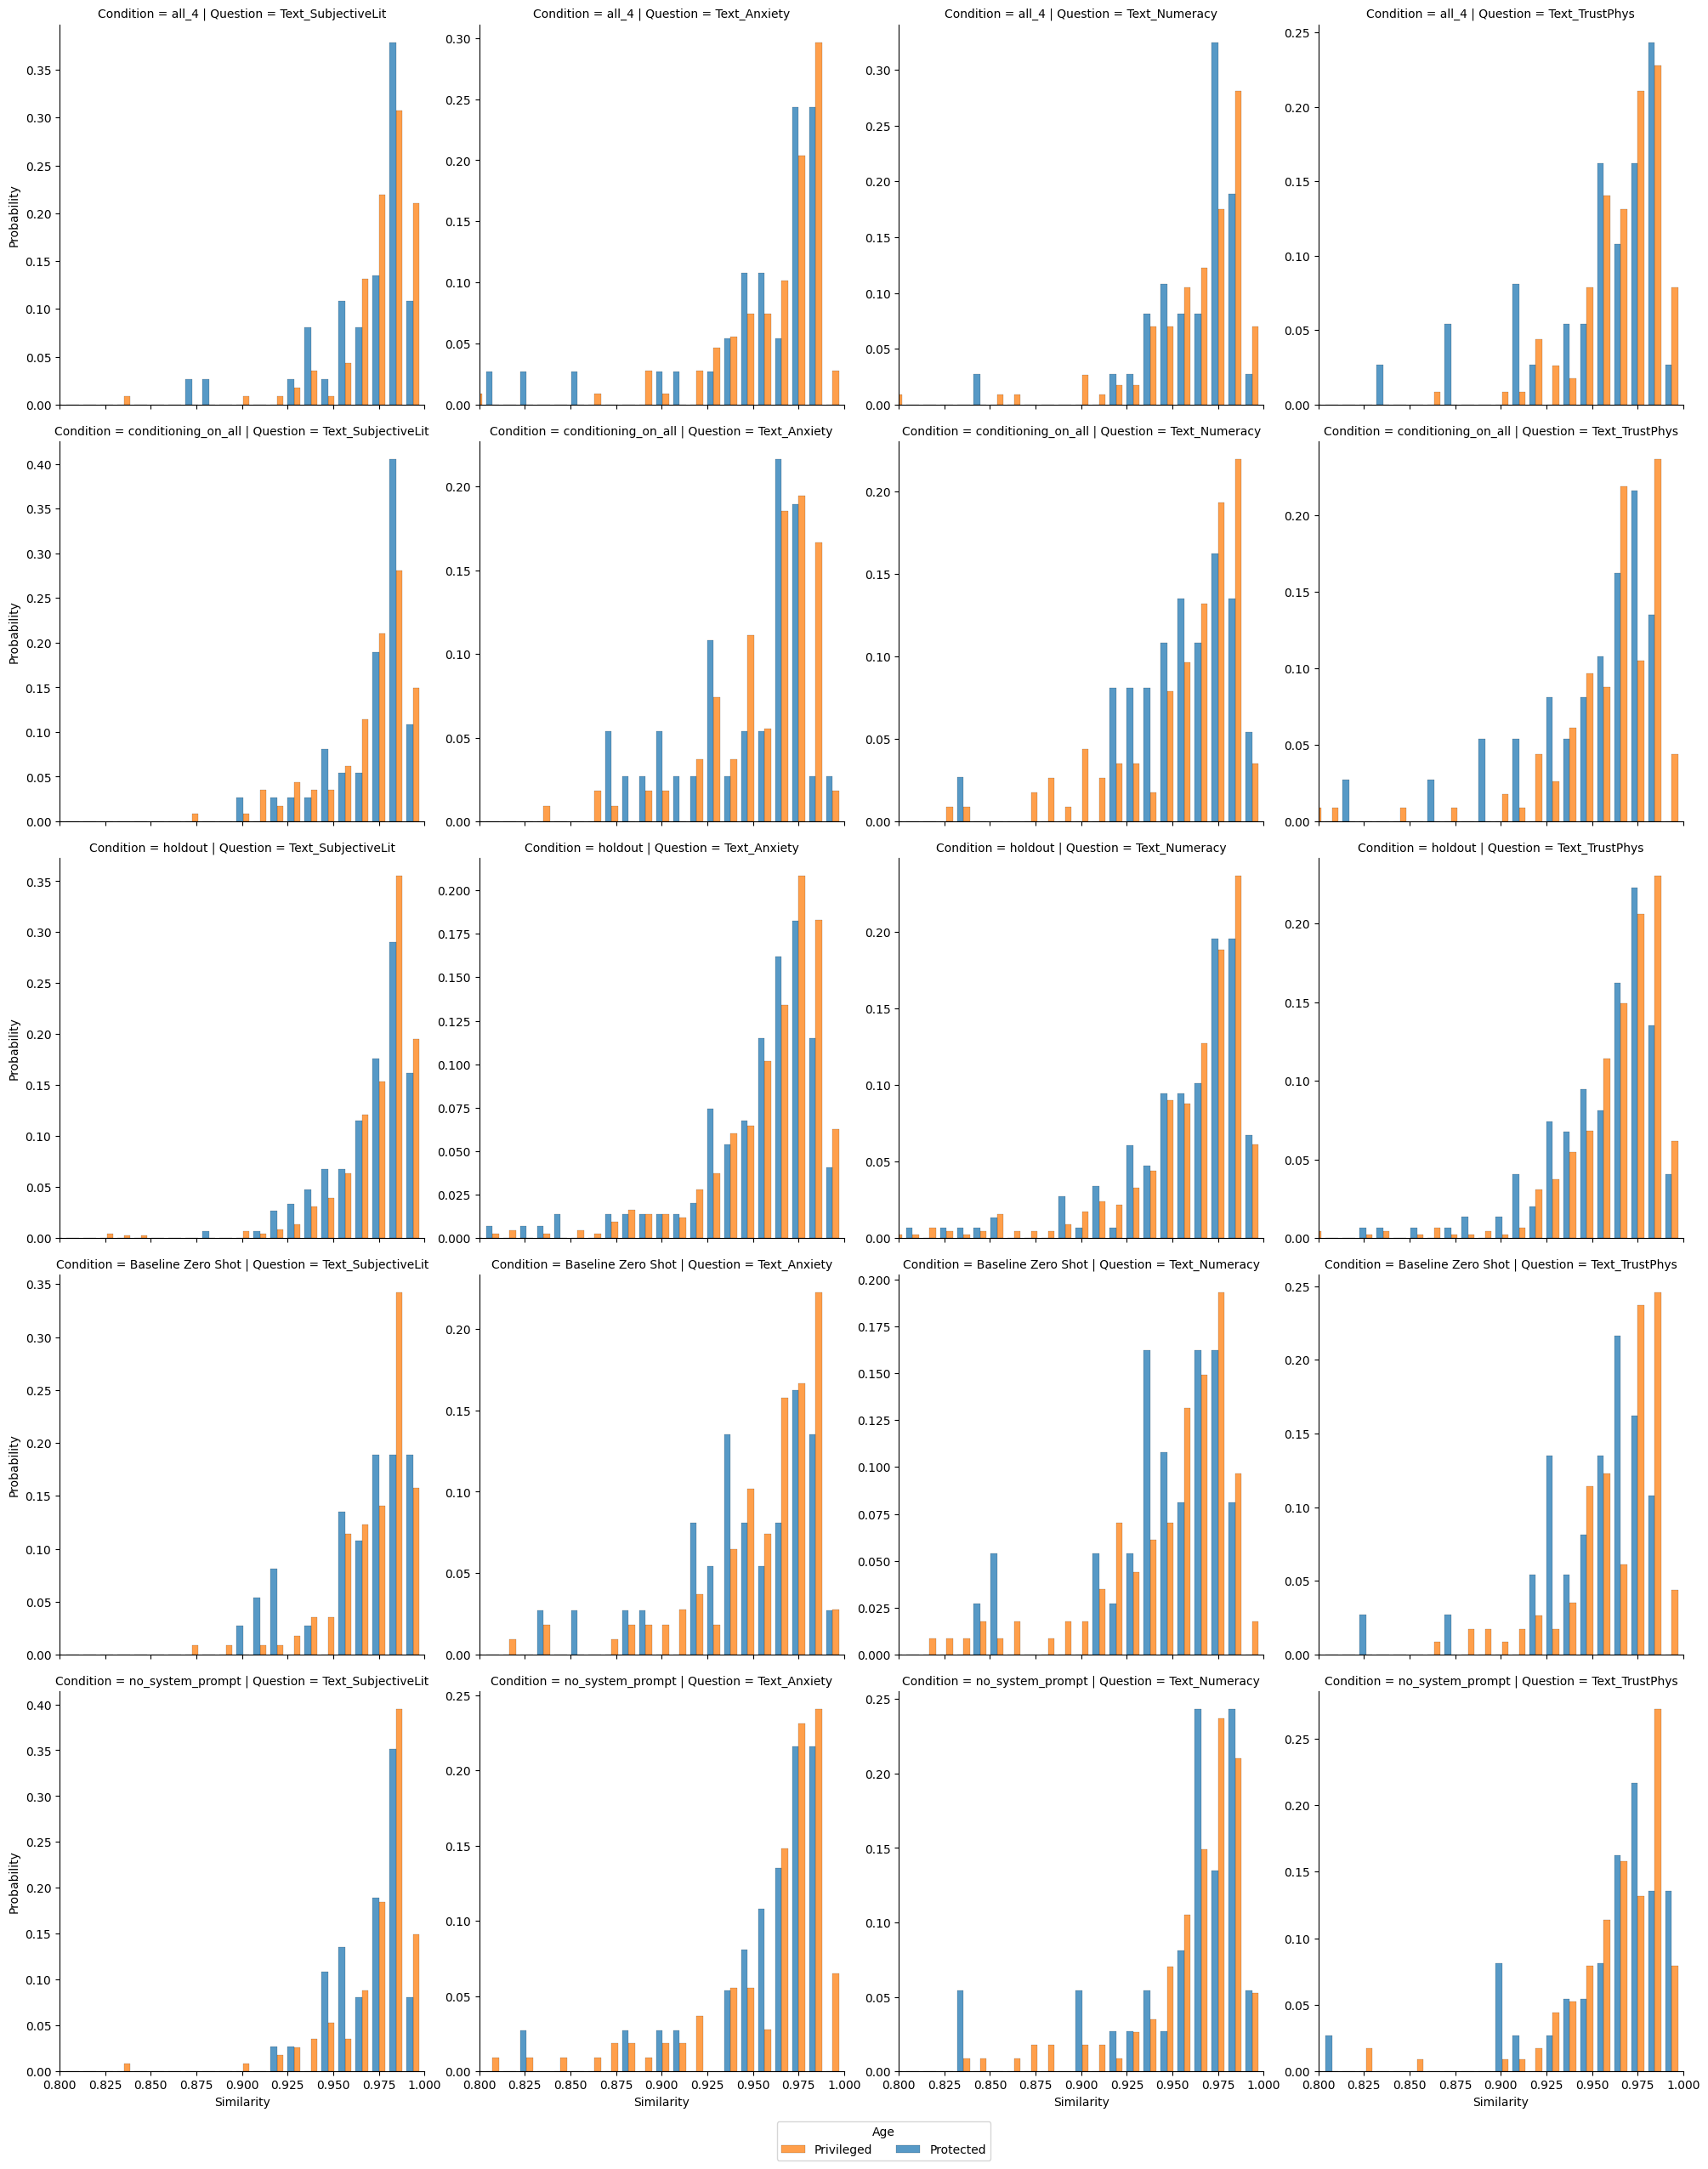

In [150]:

sns.displot(
    D, x="Similarity", hue="Age", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Age', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


/tmp/ipykernel_2231/3887088780.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Gender', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


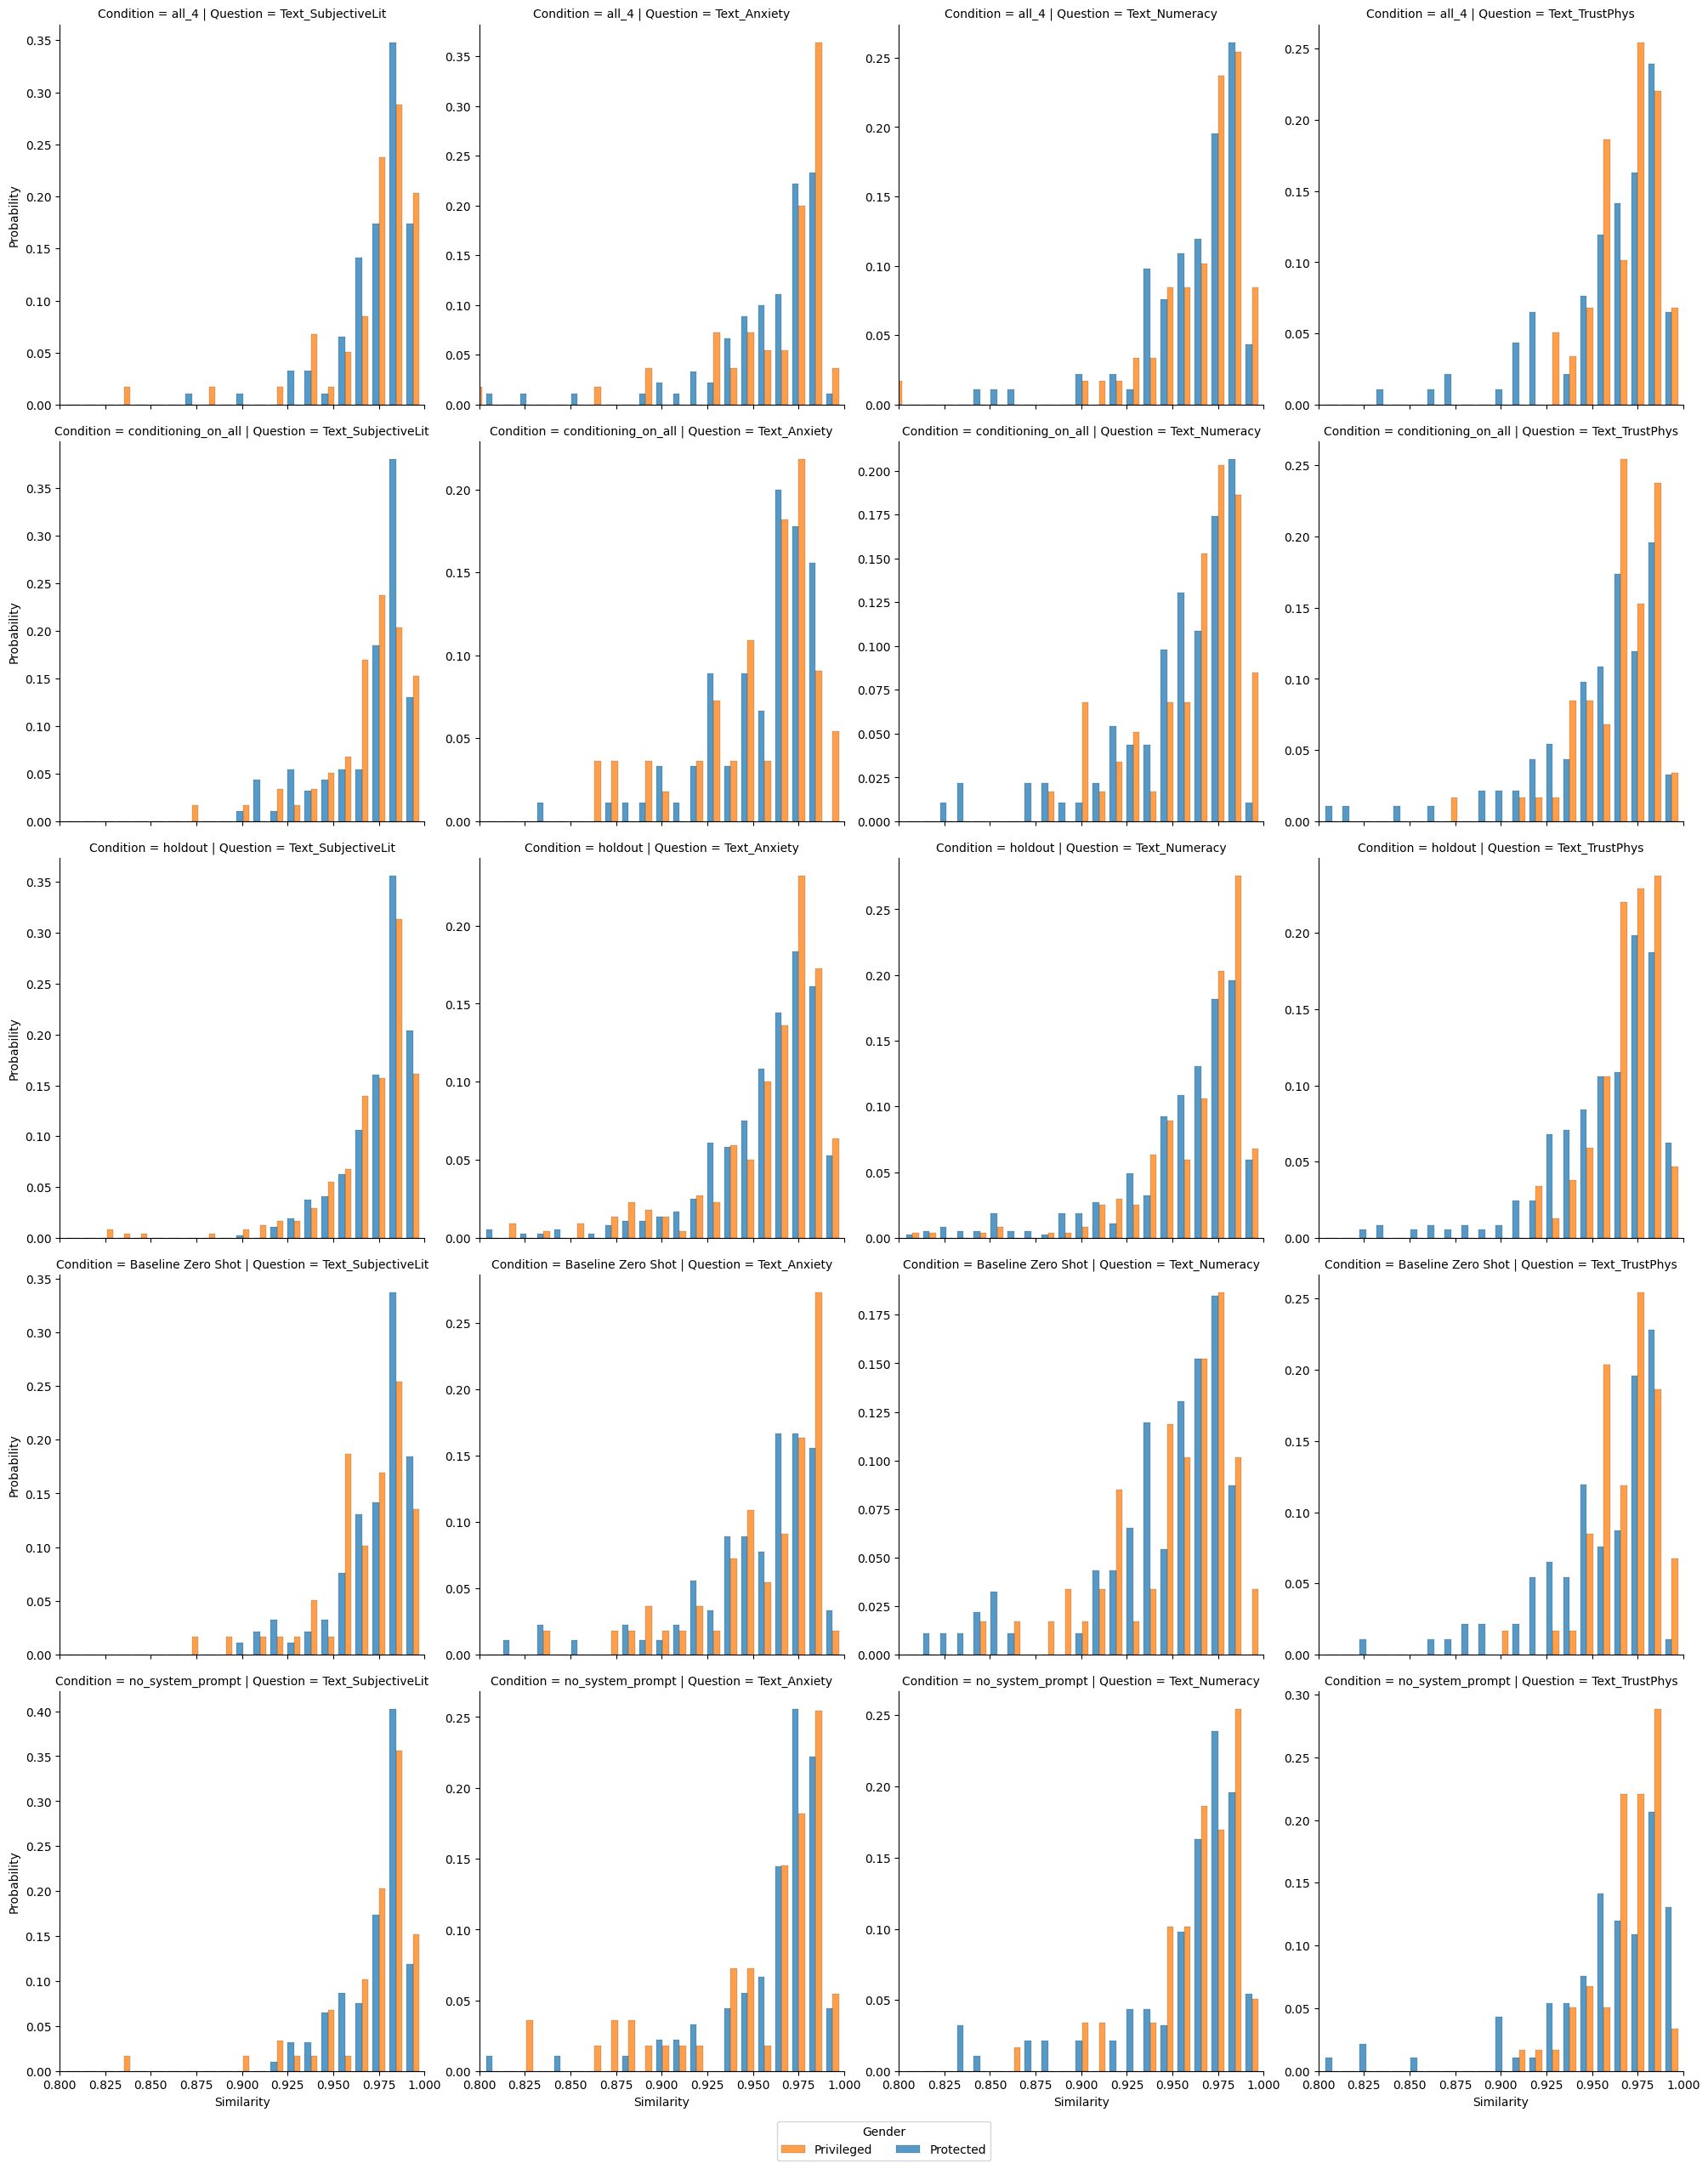

In [151]:

sns.displot(
    D, x="Similarity", hue="Gender", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Gender', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


/tmp/ipykernel_2231/3362441973.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Education', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


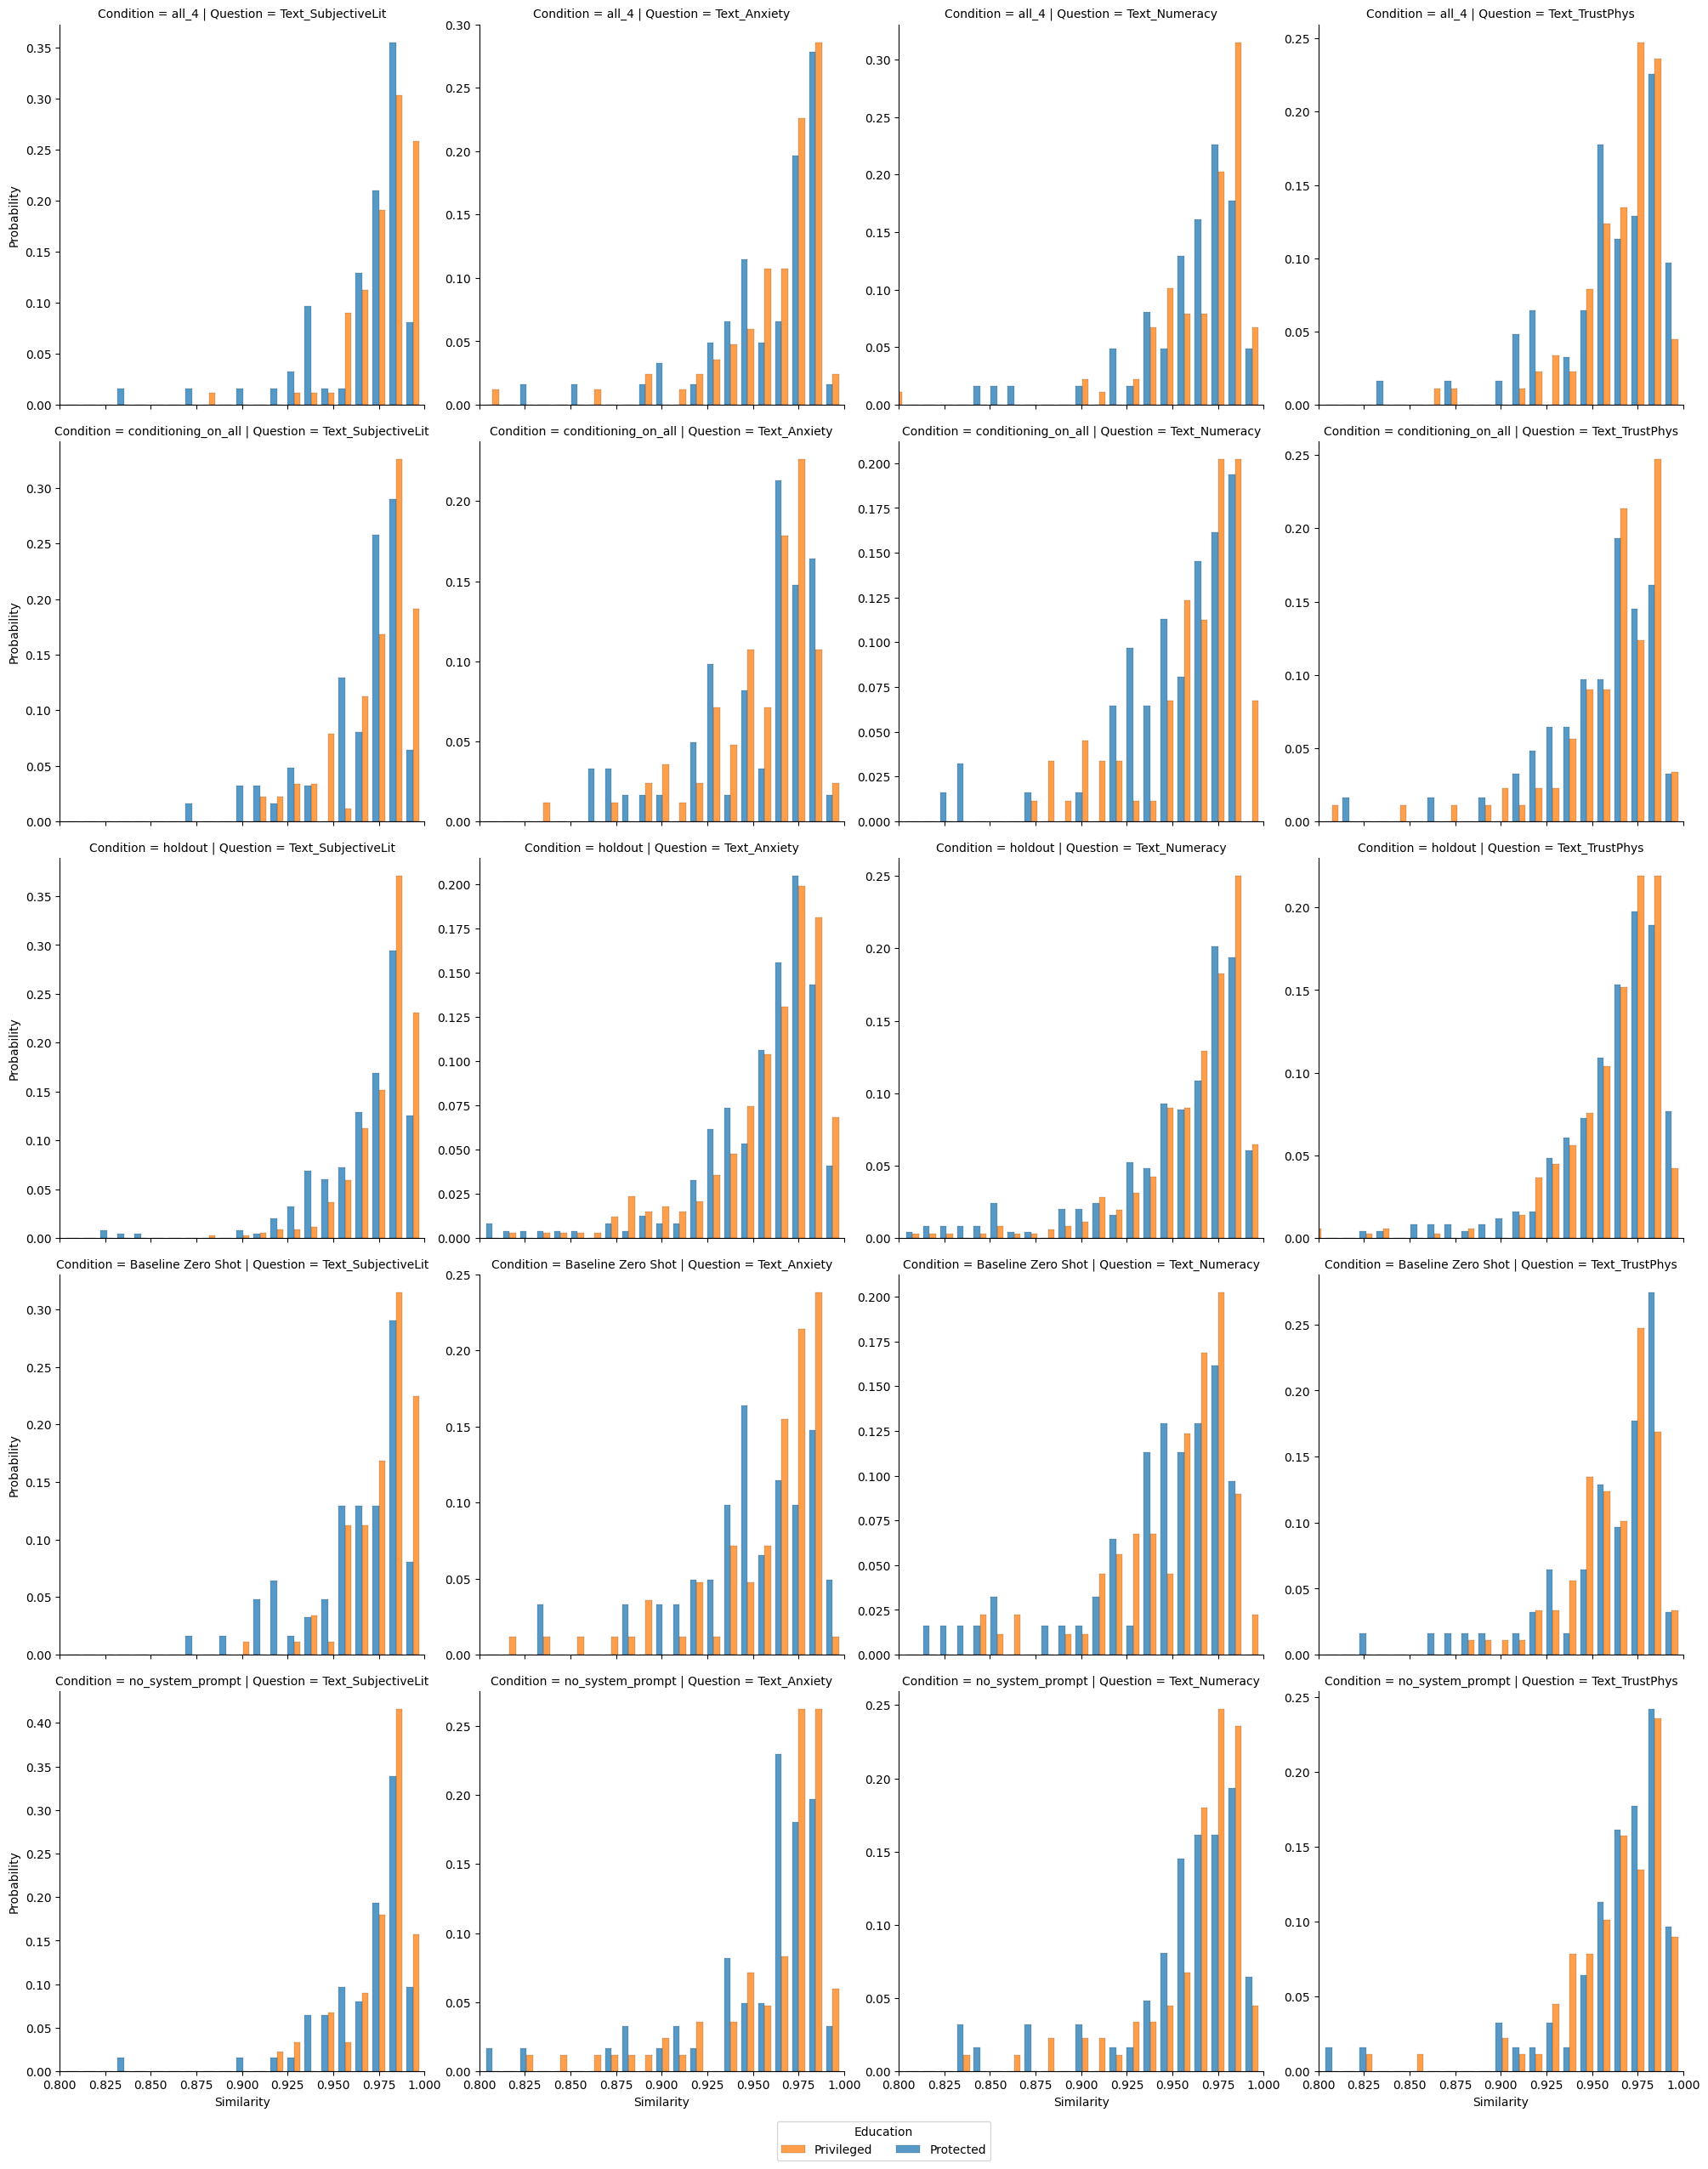

In [152]:

sns.displot(
    D, x="Similarity", hue="Education", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Education', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


/tmp/ipykernel_2231/579777826.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend([0,1], title='Income', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


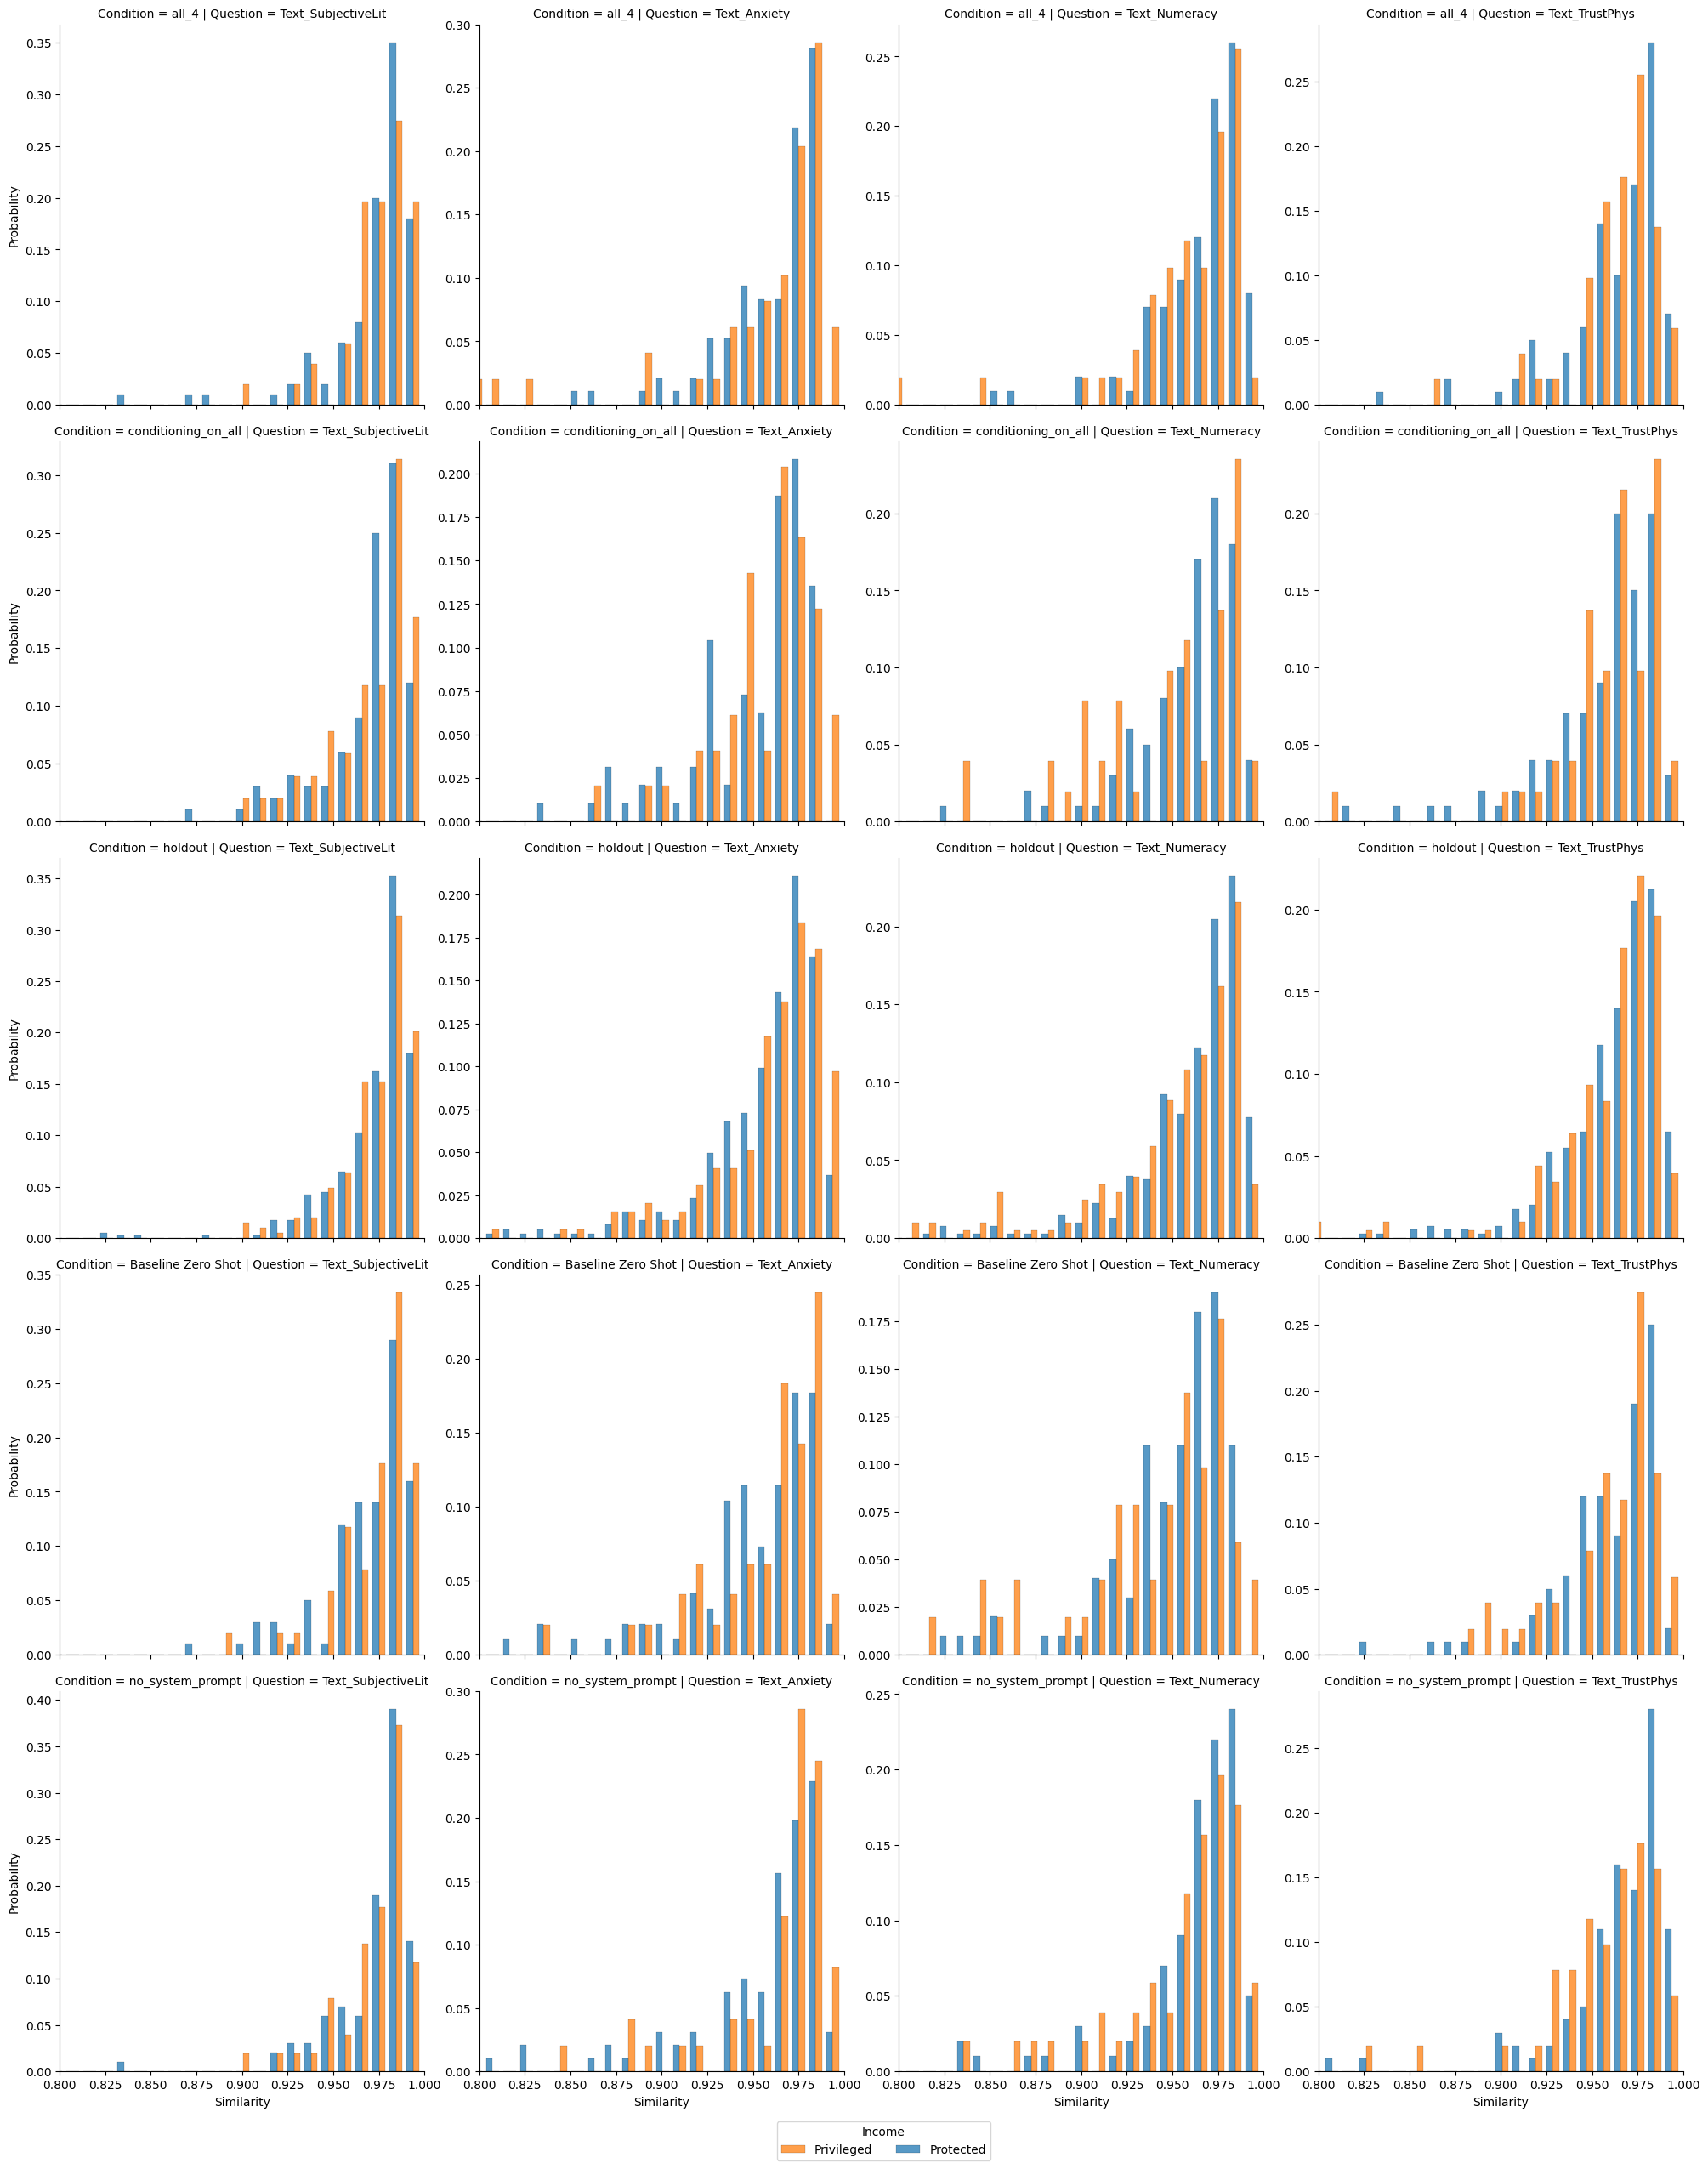

In [153]:

sns.displot(
    D, x="Similarity", hue="Income", col="Question", 
    row="Condition", kind="hist", bins=100, 
    stat="probability", 
    multiple='dodge', shrink=.75, 
    common_norm=False, #common_grid=True,
    facet_kws=dict(sharey=False),
    #bw_adjust=0.2, 
    legend=False,
    #clip=(0.8,1), #cumulative=True
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Income', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)
